In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faizanali21bcs","key":"718bcf7c30945439cde5db71b79dbfe5"}'}

In [4]:
import os
import shutil

# Create destination folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move uploaded file
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [5]:
!pip install -q kaggle

import kaggle

kaggle.api.dataset_download_files('mudasirmurtaza/sindhi-alphabets',
                                   path='sindhi_alphabets',
                                   unzip=True)


Dataset URL: https://www.kaggle.com/datasets/mudasirmurtaza/sindhi-alphabets


In [6]:
data_dir = './sindhi_alphabets'

In [7]:
data_dir

'./sindhi_alphabets'

In [8]:
!ls sindhi_alphabets


'Complete Original Dataset'


In [9]:
import os

data_dir = './sindhi_alphabets'

print("Contents of data directory:")
print(os.listdir(data_dir))  # list files/folders in dataset directory


Contents of data directory:
['Complete Original Dataset']


In [10]:
import os

image_folder = './sindhi_alphabets/Complete Original Dataset'
print(os.listdir(image_folder)[:10])  # show first 10 images


['ٻ', 'د', 'ق', 'ي', 'ھ', 'خ', 'ٺ', 'ڇ', 'ص', 'ف']


In [11]:
import pathlib
data_dir = pathlib.Path('sindhi_alphabets/Complete Original Dataset')
data_dir

PosixPath('sindhi_alphabets/Complete Original Dataset')

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3010

In [13]:
ب = list(data_dir.glob('ب/*'))
ب[:5]

[PosixPath('sindhi_alphabets/Complete Original Dataset/ب/block_0_4 (11th copy).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ب/5 (2).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ب/block_0_4 (3rd copy).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ب/2 (2).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ب/block_0_4 (9th copy).jpg')]

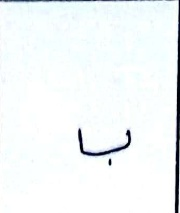

In [14]:
from PIL import Image

Image.open(str(ب[1]))

In [15]:
from pathlib import Path

data_dir = Path('./sindhi_alphabets/Complete Original Dataset')

sindhi_alphabets = [
    'ء','ا', 'ب', 'ٻ','ڀ', 'پ','ت','ٺ' ,'ٿ','ٽ', 'ث', 'ج','جھ','ڃ','ڄ','ڇ',
    'چ', 'ح', 'خ','ڊ','ڍ','ڏ','د', 'ذ','ڌ', 'ر', 'ز','ڙ', 'س', 'ش', 'ص',
    'ض','ط', 'ظ', 'ع', 'غ', 'ف','ڦ', 'ق', 'ک','ڪ', 'گ','گھ','ڱ','ڳ', 'ل',
    'م','ن', 'ڻ','ھ','و', 'ي',
]

sindhi_alphabets_images_dict = {
    letter: list(data_dir.glob(f'{letter}/*'))
    for letter in sindhi_alphabets
}

# Test print the number of images per letter
for letter, files in sindhi_alphabets_images_dict.items():
    print(f"{letter}: {len(files)} images")


ء: 58 images
ا: 58 images
ب: 58 images
ٻ: 58 images
ڀ: 58 images
پ: 58 images
ت: 58 images
ٺ: 58 images
ٿ: 58 images
ٽ: 58 images
ث: 58 images
ج: 58 images
جھ: 58 images
ڃ: 58 images
ڄ: 58 images
ڇ: 58 images
چ: 58 images
ح: 58 images
خ: 58 images
ڊ: 58 images
ڍ: 58 images
ڏ: 58 images
د: 58 images
ذ: 58 images
ڌ: 58 images
ر: 58 images
ز: 58 images
ڙ: 58 images
س: 58 images
ش: 58 images
ص: 58 images
ض: 58 images
ط: 58 images
ظ: 58 images
ع: 58 images
غ: 58 images
ف: 58 images
ڦ: 58 images
ق: 58 images
ک: 58 images
ڪ: 58 images
گ: 58 images
گھ: 58 images
ڱ: 58 images
ڳ: 58 images
ل: 58 images
م: 58 images
ن: 58 images
ڻ: 58 images
ھ: 58 images
و: 58 images
ي: 58 images


In [16]:
sindhi_alphabets_images_dict['ا']

[PosixPath('sindhi_alphabets/Complete Original Dataset/ا/5 (2).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (14).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/2 (2).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (3rd copy).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (7).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (7th copy).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (6).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (8).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (15).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (6th copy).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (9th copy).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Dataset/ا/block_0_5 (17).jpg'),
 PosixPath('sindhi_alphabets/Complete Original Da

In [17]:
print(data_dir)


sindhi_alphabets/Complete Original Dataset


In [18]:
alphabets = [
    'ء','ا', 'ب', 'ٻ','ڀ', 'پ','ت','ٺ' ,'ٿ','ٽ', 'ث', 'ج','جھ','ڃ','ڄ','ڇ',
    'چ', 'ح', 'خ','ڊ','ڍ','ڏ','د', 'ذ','ڌ', 'ر', 'ز','ڙ', 'س', 'ش', 'ص',
    'ض','ط', 'ظ', 'ع', 'غ', 'ف','ڦ', 'ق', 'ک','ڪ', 'گ','گھ','ڱ','ڳ', 'ل',
    'م','ن', 'ڻ','ھ','و', 'ي',
]

alphabet_labels_dict = {letter: idx for idx, letter in enumerate(alphabets)}

print(alphabet_labels_dict)


{'ء': 0, 'ا': 1, 'ب': 2, 'ٻ': 3, 'ڀ': 4, 'پ': 5, 'ت': 6, 'ٺ': 7, 'ٿ': 8, 'ٽ': 9, 'ث': 10, 'ج': 11, 'جھ': 12, 'ڃ': 13, 'ڄ': 14, 'ڇ': 15, 'چ': 16, 'ح': 17, 'خ': 18, 'ڊ': 19, 'ڍ': 20, 'ڏ': 21, 'د': 22, 'ذ': 23, 'ڌ': 24, 'ر': 25, 'ز': 26, 'ڙ': 27, 'س': 28, 'ش': 29, 'ص': 30, 'ض': 31, 'ط': 32, 'ظ': 33, 'ع': 34, 'غ': 35, 'ف': 36, 'ڦ': 37, 'ق': 38, 'ک': 39, 'ڪ': 40, 'گ': 41, 'گھ': 42, 'ڱ': 43, 'ڳ': 44, 'ل': 45, 'م': 46, 'ن': 47, 'ڻ': 48, 'ھ': 49, 'و': 50, 'ي': 51}


In [19]:
str(sindhi_alphabets_images_dict['ب'][0])

'sindhi_alphabets/Complete Original Dataset/ب/block_0_4 (11th copy).jpg'

In [20]:
import cv2
img = cv2.imread(str(sindhi_alphabets_images_dict['ب'][0]))
img.shape

(213, 180, 3)

In [21]:
X = []
y = []

for alphabet, images in sindhi_alphabets_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(alphabet_labels_dict[alphabet])

In [22]:
X[:1]

[array([[[ 10,   6,   5],
         [119, 115, 114],
         [211, 209, 208],
         ...,
         [ 90,  81,  77],
         [ 13,   4,   1],
         [ 12,   3,   0]],
 
        [[ 10,   5,   4],
         [119, 114, 113],
         [210, 208, 207],
         ...,
         [ 94,  85,  81],
         [ 16,   7,   3],
         [ 11,   2,   0]],
 
        [[ 10,   2,   2],
         [119, 113, 112],
         [210, 207, 205],
         ...,
         [100,  90,  86],
         [ 20,  10,   6],
         [ 14,   4,   0]],
 
        ...,
 
        [[  8,   4,   3],
         [  9,   4,   3],
         [ 81,  72,  72],
         ...,
         [254, 254, 251],
         [254, 252, 248],
         [253, 252, 248]],
 
        [[  9,   5,   4],
         [  8,   3,   2],
         [ 70,  61,  61],
         ...,
         [252, 252, 249],
         [253, 252, 248],
         [253, 252, 248]],
 
        [[  8,   4,   3],
         [  6,   2,   1],
         [ 62,  54,  53],
         ...,
         [251, 251, 248],
  

In [23]:
import numpy as np

X = np.array(X)
y = np.array(y)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.05, random_state=0)

In [25]:
len(X_train)

2865

In [26]:
len(X_test)

151

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 251],
        [254, 255, 251],
        [254, 255, 251]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       ...,

       [[250, 255, 254],
        [250, 253, 253],
        [252, 252, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 254, 253],
        [248, 251, 251],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 255],
        [249, 251, 251],
        [250, 252, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
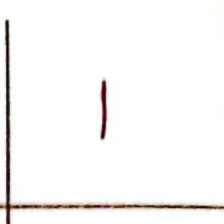

In [27]:
X[69]

In [28]:
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

In [29]:
X_test_scaled[140]

array([[[0.99607843, 1.        , 0.98039216],
        [0.99607843, 1.        , 0.98039216],
        [0.99607843, 1.        , 0.98039216],
        ...,
        [0.01960784, 0.01568628, 0.01568628],
        [0.10196079, 0.09411765, 0.09411765],
        [0.28627452, 0.2784314 , 0.2784314 ]],

       [[0.99607843, 1.        , 0.98039216],
        [0.99607843, 1.        , 0.98039216],
        [1.        , 1.        , 0.98039216],
        ...,
        [0.01960784, 0.01568628, 0.01568628],
        [0.10588235, 0.09803922, 0.09803922],
        [0.2901961 , 0.28235295, 0.28235295]],

       [[0.99607843, 1.        , 0.9843137 ],
        [0.99607843, 1.        , 0.9843137 ],
        [1.        , 1.        , 0.9843137 ],
        ...,
        [0.02745098, 0.01568628, 0.01176471],
        [0.10980392, 0.09803922, 0.09411765],
        [0.3019608 , 0.2901961 , 0.28627452]],

       ...,

       [[0.9529412 , 0.972549  , 0.9764706 ],
        [0.9411765 , 0.9607843 , 0.9647059 ],
        [0.9254902 , 0

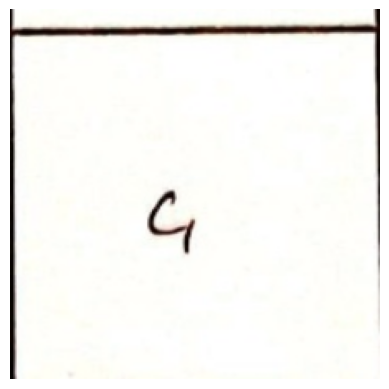

In [30]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(X[0])

In [31]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomContrast(0.1),
])

In [32]:
# import matplotlib.pyplot as plt
# plt.axis('off')
# plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [33]:
import tensorflow_hub as hub

feature_extractor_model = (
  "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"
)

In [34]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False
)

In [35]:
feature_extractor = hub.KerasLayer(
   "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
    input_shape=(224, 224, 3),  # must match model
    trainable=False,
)

In [36]:
NUM_CLASSES = 52

In [37]:
import tensorflow as tf

class FeatureExtractorLayer(tf.keras.layers.Layer):
    def __init__(self, feature_extractor, **kwargs):
        super().__init__(**kwargs)
        self.feature_extractor = feature_extractor

    def call(self, inputs):
        return self.feature_extractor(inputs)

    def get_config(self):

        config = super().get_config()

        return config


In [38]:
model = tf.keras.Sequential([
    data_augmentation,
    FeatureExtractorLayer(feature_extractor),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.0806 - loss: 4.0433 - val_accuracy: 0.1394 - val_loss: 3.3536
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.2667 - loss: 2.6636 - val_accuracy: 0.3066 - val_loss: 2.6467
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4033 - loss: 2.0776 - val_accuracy: 0.4460 - val_loss: 2.1311
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4932 - loss: 1.7114 - val_accuracy: 0.4216 - val_loss: 1.9597
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5364 - loss: 1.5474 - val_accuracy: 0.5610 - val_loss: 1.5297
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.5964 - loss: 1.3525 - val_accuracy: 0.5052 - val_loss: 1.4910
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6191 - loss: 1.2577 - val_accuracy: 0.6063 - val_loss: 1.3582
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6282 - loss: 1.1759 - val_accuracy:

In [42]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

5/5 - 0s - 70ms/step - accuracy: 0.8013 - loss: 0.7434
Test Accuracy: 0.8013
Test Loss: 0.7434


In [44]:
model.save("model.keras")

In [45]:
from google.colab import files
files.download("model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_extractor_layer         │ (None, 1280)           │             0 │
│ (FeatureExtractorLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 52)             │        13,364 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025,950 (3.91 MB)

 Trainable params: 341,812 (1.30 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 683,626 (2.61 MB)

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
